<a class="anchor" id="0"></a>
# MNIST - Deep Neural Network with Keras

In this notebook, we will build a deep neural network on MNIST handwritten digit images to classify them. 


MNIST is called the "Hello World" in Deep Learning and it is actually an image recognition task.


# 1. Objective of the notebook <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

- In this notebook, we create a **Multilayer Perceptron (MLP)** model of the MNIST dataset. 

- **Multilayer Perceptrons (MLPs)** usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting the data. 

- These MLP models are also referred to as either **deep feedforward networks** or **feedforward neural networks**. MLPs are common in simple logistic and linear regression problems.

- So, the objective is to create a neural network for identifying numbers based on handwritten digits. For example, when the input to the network is an image of a handwritten number 8, the corresponding prediction must also be the digit 8. 

- To both train and validate a neural network, there must be a sufficiently large dataset of handwritten digits.

- The Modified National Institute of Standards and Technology dataset or MNIST dataset for short, is often considered as the Hello World! of deep learning and is a suitable dataset for handwritten digit classification.

- MNIST is used to explain and validate deep learning theories because the 70,000 samples it contains are small, yet sufficiently rich in information (MNIST dataset is described later).

So, we will start by importing the necessary libraries:

# 2. Import necessary libraries <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import  backend as K



# 2.1 Sanity Checks  <a class="anchor" id="2"></a> 

Check whether the environment is functioning efficiently and as expected

In [ ]:
#Check if GPU is used
my_gpu_device_name = tf.test.gpu_device_name()

if my_gpu_device_name != '/device:GPU:0':
  raise SystemError('GPU not found!')
  
print(f'Available GPU : {my_gpu_device_name}')

Available GPU : /device:GPU:0


In [ ]:
#Check which GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)

if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Sep  3 13:50:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |    284MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Check how much memory is still available
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [ ]:
print(tf.__version__)   #show the version of TensorFlow we are using

2.8.2


# 3. MNIST dataset <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


- MNIST is a collection of handwritten digits ranging from the number 0 to 9. 

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels. 

- To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically. 

- The following Keras code shows how to access MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets.

In [ ]:
# import dataset
from keras.datasets import mnist


# load and split dataset into training and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))  #"\n" --> new line


11501568/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


# 4. Data visualization <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)


- The following code will help to sample the 25 random MNIST digits and visualize them.

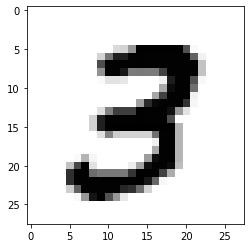

In [ ]:
# Display images

import matplotlib.pyplot as plt
plt.imshow(x_train[7], cmap=plt.cm.binary)

In [ ]:
# View the labels
print(y_train[7])

3


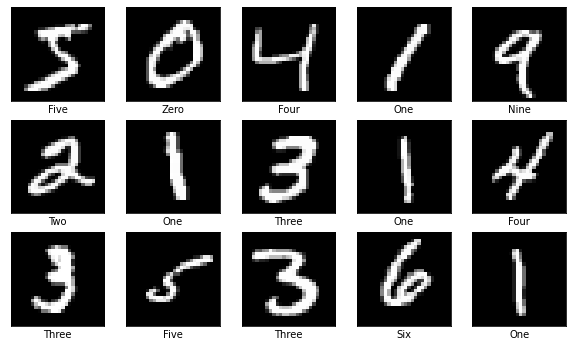

In [ ]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

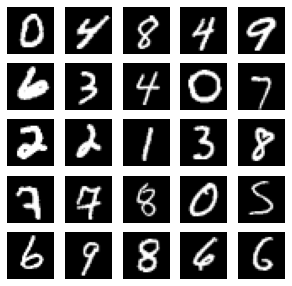

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

## 5. Data representation in Keras <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

- Keras uses a multidimensional array of Numpy as a basic data structure. We call this data structure a **tensor**. 

- A tensor has three main attributes:

  - **Number of axes (Rank)**:  
  
    - A tensor containing a single number will be called **scalar** (or a 0-dimensional tensor, or tensor 0D). 
    - An array of numbers is called **vector**, or tensor 1D. 
    - An array of vectors will be a matrix, or 2D tensor. 
    - If we pack this matrix in a new array, we get a 3D tensor, which we can interpret visually as a cube of numbers. 
    - By packaging a 3D tensioner in an array, we can create a 4D tensioner and so on. 
    - In the Python Numpy library this is called the **tensor’s ndim**.
    
    
  - **Shape**:
  
     - It is a tuple of integers that describe how many dimensions the tensor has along each axis. 
     - In the Numpy library this attribute is called **Shape**.
     
     
  - **Data type**: 
  
    - This attribute indicates the type of data that contains the tensor, which can be for example uint8, float32, float64, etc. 
    - In the Numpy library this attribute is called **dtype**.


# 5. Designing model architecture using Keras <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)


- The MLP model, discussed above can be used for MNIST digits classification. 

- When the units or perceptrons are exposed, the MLP model is a fully connected network.

- The following code shows how to design the MLP model architecture using Keras.

- The first step in designing the model architecture is to import the Keras layers. This can be done as follows:




We can obtain the number of axes and dimensions of the tensor `train_images` from our previous example as follows:

In [ ]:
# View number of dimensions of tensor

print(x_train.ndim)

3


In [ ]:
# View the dimension of tensor

print(x_train.shape)

(60000, 28, 28)


To know the data type it contains, we can run the following command:

In [ ]:
# View the data type of tensor

print(x_train.dtype)

uint8


## 5.1 Import Keras layers <a class="anchor" id="5.1"></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

## 5.2 Compute the number of labels <a class="anchor" id="5.2"></a>

- Now, the data must be in the correct shape and format. 

- After loading the MNIST dataset, the number of labels is computed as:

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 5.3 Data Preprocessing <a class="anchor" id="5.4"></a>


- In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.

- The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult. 

- The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.  

- The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 * 28] and [10000, 28 * 28], respectively.

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

Data normalization could be done as follows :

In [ ]:
# Resize and normalize
# scale the input values to type float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [ ]:
# scale the input values within the interval [0, 1]

x_train /= 255
x_test /= 255

- To facilitate the entry of data into our neural network we must make a transformation of the tensor (image) from 2 dimensions (2D) to a vector of 1 dimension (1D). 
- That is, the matrix of 28×28 numbers can be represented by a vector (array) of 784 numbers (concatenating row by row), which is the format that accepts as input a densely connected neural network. 
- In Python, converting every image of the MNIST dataset to a vector with 784 components can be accomplished as follows:

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

- After executing the above Python instructions, we can verify that `x_train.shape` gives (60000, 784) and `x_test.shape` gives (10000, 784). 
- The first dimension indexes the image and the second indexes the pixel in each image (now the intensity of the pixel is a value between 0 and 1):

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## 5.3 One-Hot Encoding <a class="anchor" id="5.3"></a>

- At this point, the labels are in digits format, 0 to 9. 

- This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class. 

- A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class. 

- For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.



- To see the effect of the transformation we can see the values before and after applying `to_categorical`:

In [ ]:
print(y_test[0])

7


In [ ]:
print(y_train[0])

5


- The following lines convert each label into a one-hot vector:

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# redo test
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# redo test
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000, 10)


- Now, our dataset is ready to be fed in the neural network.
- We will program it in Keras in the following section.

In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 5.5 Setting network parameters <a class="anchor" id="5.5"></a>

- Now, we will set the network parameters as follows:

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

- The **batch_size** argument indicates the number of data that we will use for each update of the model parameters.

- **Hidden_units** shows the number of hidden units.

- **Dropout** is the dropout rate (more on this in section 7 - **Overfitting and Regularization**).

## 5.6 Designing the model architecture <a class="anchor" id="5.6"></a>


- The next step is to design the model architecture. The proposed model is made of three MLP layers. 

- In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer. 

- Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout. 

- 256 units are chosen since 128, 512 and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.

- The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.

- The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:

`from keras.models import Sequential`

`model = Sequential()`

- The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.

- In Keras, we can add the required types of layers through the **add()** method.

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model_1 = Sequential()
model_1.add(Dense(hidden_units, input_dim=input_size))
model_1.add(Activation('relu'))
model_1.add(Dropout(dropout))
model_1.add(Dense(hidden_units))
model_1.add(Activation('relu'))
model_1.add(Dropout(dropout))
model_1.add(Dense(num_labels))
model_1.add(Activation('softmax'))

- Since a Dense layer is a linear operation, a sequence of Dense layers can only approximate a linear function. 

- The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings. 

- relu or Rectified Linear Unit (ReLU) is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

## 5.7 View model summary <a class="anchor" id="5.7"></a>

- Keras library provides us **summary()** method to check the model description.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

- The above listing shows the model summary of the proposed network. It requires a total of 269,322 parameters.

- This is substantial considering that we have a simple task of classifying MNIST digits. So, MLPs are not parameter efficient. 

- The total number of parameters required can be computed as follows:

  - From input to Dense layer: 784 × 256 + 256 = 200,960. 
  
  - From first Dense to second Dense: 256 × 256 + 256 = 65,792. 
  
  - From second Dense to the output layer: 10 × 256 + 10 = 2,570. 
  
  - The total is 200,690 + 65,972 + 2,570 = 269,322.

- Another way of verifying the network is by calling the **plot_model()** method as follows:

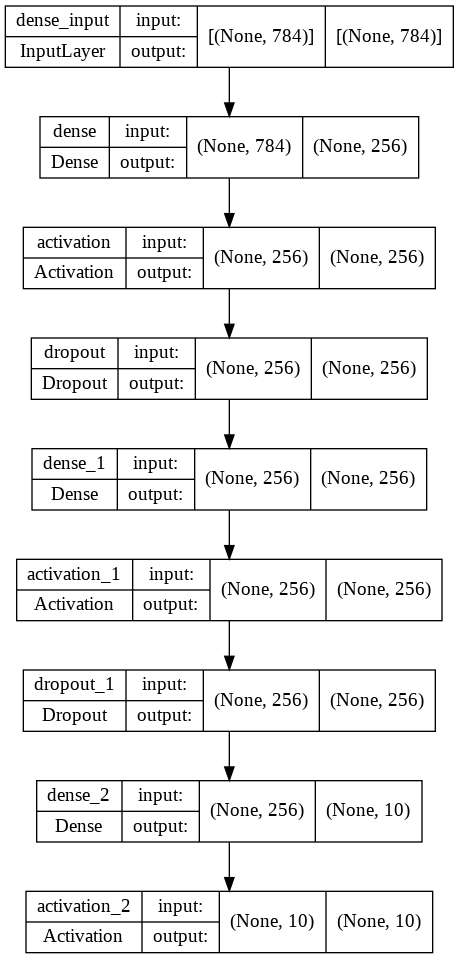

In [ ]:
plot_model(model_1, to_file='mlp-mnist.png', show_shapes=True)

# 6. Implement MLP model using Keras <a class="anchor" id="6"></a>


[Back to Table of Contents](#0.1)


- The implementation of MLP model in Keras comprises of three steps:-

  - Compiling the model with the compile() method.
  
  - Training the model with fit() method.
  
  - Evaluating the model performance with evaluate() method.
  
  
- For detailed discussion on implementation, please refer to my previous kernel [Comprehensive Guide to ANN with Keras](https://www.kaggle.com/prashant111/comprehensive-guide-to-ann-with-keras)

## 6.1 Compile the model with compile() method <a class="anchor" id="6.1"></a>


- Compilation of model can be done as follows:

In [ ]:
model_1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

### Loss function (categorical_crossentropy)

- How far the predicted tensor is from the one-hot ground truth vector is called **loss**.

- In this example, we use **categorical_crossentropy** as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction. 

- There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning. 

- For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

### Optimization (optimizer adam)

- With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

- In Keras, there are several choices for optimizers. The most commonly used optimizers are; **Stochastic Gradient Descent (SGD)**, **Adaptive Moments (Adam)** and **Root Mean Squared Propagation (RMSprop)**. 

- Each optimizer features tunable parameters like learning rate, momentum, and decay. 

- Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

### Metrics (accuracy)

- Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss. 

- During training, validation, and testing, other metrics such as **accuracy** can also be included. 

- **Accuracy** is the percent, or fraction, of correct predictions based on ground truth.

## 6.2 Train the model with fit() method <a class="anchor" id="6.2"></a>

In [ ]:
history = model_1.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=batch_size)

Epoch 1/50
329/329 [==============================] - 3s 5ms/step - loss: 0.5066 - accuracy: 0.8439 - val_loss: 0.1912 - val_accuracy: 0.9438
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2248 - accuracy: 0.9329 - val_loss: 0.1461 - val_accuracy: 0.9576
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.1747 - accuracy: 0.9474 - val_loss: 0.1158 - val_accuracy: 0.9651
Epoch 4/50
329/329 [==============================] - 2s 7ms/step - loss: 0.1433 - accuracy: 0.9571 - val_loss: 0.1104 - val_accuracy: 0.9658
Epoch 5/50
329/329 [==============================] - 2s 7ms/step - loss: 0.1254 - accuracy: 0.9618 - val_loss: 0.1050 - val_accuracy: 0.9688
Epoch 6/50
329/329 [==============================] - 3s 8ms/step - loss: 0.1125 - accuracy: 0.9660 - val_loss: 0.0999 - val_accuracy: 0.9704
Epoch 7/50
329/329 [==============================] - 3s 11ms/step - loss: 0.1000 - accuracy: 0.9693 - val_loss: 0.0919 - val_accuracy: 0.9738
Epoch

## 6.3 Evaluating model performance with evaluate() method <a class="anchor" id="6.3"></a>

In [ ]:
loss, acc = model_1.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy for the model_1 : %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.9815

Test accuracy for the model_1 : 98.2%


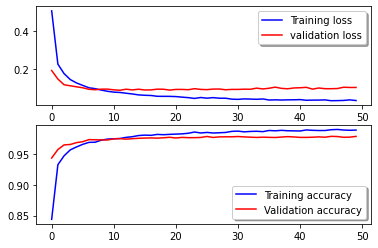

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
# Define Optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile model
model_2 = model_1
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Audjusting learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',  # Reduce learning rate when a metric has stopped improving (when training is not progressing). Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. 
                                            patience=3,          # This scheduler reads a metrics quantity and if no improvement is seen for a ‘patience’ number of epochs, the learning rate is reduced.
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

history = model_2.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=batch_size, callbacks=[learning_rate_reduction])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


329/329 [==============================] - 2s 5ms/step - loss: 0.0271 - accuracy: 0.9921 - val_loss: 0.1281 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.1408 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 3/50
329/329 [==============================] - 1s 5ms/step - loss: 0.0274 - accuracy: 0.9924 - val_loss: 0.1446 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 4/50
323/329 [============================>.] - ETA: 0s - loss: 0.0251 - accuracy: 0.9928
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
329/329 [==============================] - 1s 4ms/step - loss: 0.0248 - accuracy: 0.9929 - val_loss: 0.1525 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.1531 - val_accuracy: 0.9792 - lr: 5.0000e-04
Epoch 6/50
329/329 [==============================] - 1s 5ms/step - los

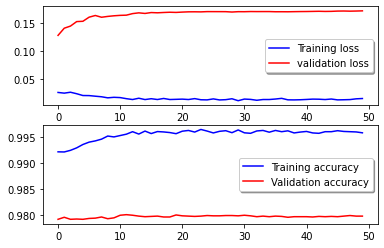

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
loss, acc = model_2.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy for the model_2 : %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.1398 - accuracy: 0.9831

Test accuracy for the model_2 : 98.3%


In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Define Optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile model
model_3 = model_1
model_3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Audjusting learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# Adding early stopping
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto')

history = model_3.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=batch_size, callbacks=[learning_rate_reduction, early_stop])



Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


329/329 [==============================] - 2s 5ms/step - loss: 0.0244 - accuracy: 0.9936 - val_loss: 0.1883 - val_accuracy: 0.9793 - lr: 0.0010
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.0263 - accuracy: 0.9931 - val_loss: 0.1880 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 3/50
329/329 [==============================] - 2s 5ms/step - loss: 0.0275 - accuracy: 0.9930 - val_loss: 0.1875 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 4/50
329/329 [==============================] - 2s 5ms/step - loss: 0.0273 - accuracy: 0.9928 - val_loss: 0.1780 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.0264 - accuracy: 0.9932 - val_loss: 0.1799 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 6/50
329/329 [==============================] - 1s 5ms/step - loss: 0.0274 - accuracy: 0.9932 - val_loss: 0.1997 - val_accuracy: 0.9779 - lr: 0.0010
Epoch 7/50
321/329 [============================>.] - ETA: 0s - loss: 0.0258 - ac

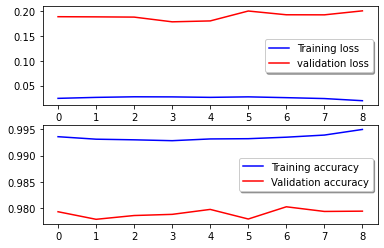

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
loss, acc = model_3.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy for the model_3 : %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.9826

Test accuracy for the model_3 : 98.3%


# 7. Overfitting and Regularization <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)


- A neural network has the property to memorize the characteristics of training data. This is called **overfitting**.

- In such a case, the network fails to generalize when subject to the test data.

- To avoid this tendency, the model uses a regularizing layer or function. A commonly used regularizing layer is referred to as a **Dropout layer**.

- Given a dropout rate (dropout=0.45), the **Dropout layer** randomly removes the fraction of units from participating in the next layer. For example, if the first layer has 256 units, after dropout=0.45 is applied, only (1 - 0.45) * 256 units = 140 units from layer 1 participate in layer 2.

- The Dropout layer makes neural networks robust to unforeseen input data because the network is trained to predict correctly, even if some units are missing. 

- The dropout is not used in the output layer and it is only active during training. Moreover, dropout is not present during prediction.

- There are regularizers that can be used other than dropouts like l1 or l2. In Keras, the bias, weight and activation output can be regularized per layer. - l1 and l2 favor smaller parameter values by adding a penalty function. Both l1 and l2 enforce the penalty using a fraction of the sum of absolute (l1) or square (l2) of parameter values. 

- So, the penalty function forces the optimizer to find parameter values that are small. Neural networks with small parameter values are more insensitive to the presence of noise from within the input data.

- So, the l2 weight regularizer with fraction=0.001 can be implemented as:

In [ ]:
# from keras.regularizers import l2
# model.add(Dense(hidden_units,
#                kernel_regularizer=l2(0.001),
#                input_dim=input_size))

'''#Regularizers :
from tensorflow.keras.regularizers import l2, l1
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=l1(l=0.1)))
model.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))
'''

"#Regularizers :\nfrom tensorflow.keras.regularizers import l2, l1\nmodel.add(tf.keras.layers.Dense(128, activation='relu'))\nmodel.add(tf.keras.layers.Dropout(0.2))\nmodel.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=l1(l=0.1)))\nmodel.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.1, l2=0.01)))\n"

- No additional layer is added if l1 or l2 regularization is used. The regularization is imposed in the Dense layer internally. For the proposed model, dropout still has a better performance than l2.

## 8. Confusion-matrix <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)


- In Machine Learning, a very useful tool to evaluate the model is **Confusion Matrix**.

- It is a table with rows and columns that count the predictions in comparison with the real values. 

- This table can be used to understand the performance of the model. 

- It is very useful to show explicitly when one class is confused with another. 

- A confusion matrix for a binary classifier is shown below:-

![Confusion-Matrix for a Binary Classifier](https://miro.medium.com/max/807/1*UIFVpCx4h1yW1WqRS-2C2w.png)

- **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)** and **False Negatives (FN)** are the four different possible outcomes of a single prediction for a two-class case with classes “1” (“positive”) and “0” (“negative”).

- A **False Positive (FP)** is when the outcome is incorrectly classified as positive, when it is in fact negative. A **False Negative (FN)** is when the outcome is incorrectly classified as negative when it is in fact positive. **True Positives (TP)** and **True Negatives (TN)** are obviously correct classifications.

- With this confusion matrix, the accuracy can be calculated by adding the values of the diagonal and dividing them by the total:

**Accuracy = (TP + TN) / (TP + FP + FN + TN)**


- There is another metric called **Sensitivity (or recall)** that tells us how well the model avoids false negatives:

**Sensitivity = TP / (TP + FN)**


- From the confusion matrix, several other metrics can be obtained.

- But in this case, there are 10 classes instead of 2. So, in this case, Scikit-learn package can be used to evaluate the quality of the model by calculating the confusion matrix.

- The following code can be used to generate the confusion-matrix:

In [ ]:
import itertools
# Plot confusion matrix 
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

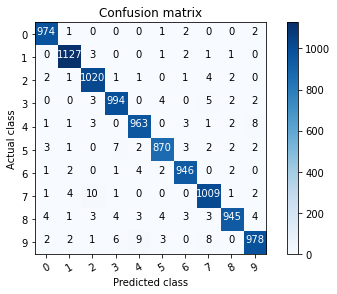

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model_3.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))



- In this case, the elements of the diagonal represent the number of points in which the label predicted by the model coincides with the actual value of the label, while the other values indicate the cases in which the model has classified incorrectly. 

- Therefore, the higher the values of the diagonal, the better the prediction will be. 

- If we calculate the sum of the values of the diagonal divided by the total values of the matrix, we get the same accuracy that the evaluate() method has returned.

## 9. Generate predictions <a class="anchor" id="11"></a>

[Back to Table of Contents](#0.1)


- We have build the ANN model to classify the MNIST digits.

- Now, we need to know how we can use the trained model to make predictions. 

- It consists in predict which digit represents an image. 

- In order to do this, Keras supply the **predict()** method.

- To test this method we can choose any element. 

- For simplicity, we will take one from the test dataset x_test. For example let’s choose the element 11 of this dataset x_test.

- Now, we will see the **predict()** method in action. 

- We execute the following code, correctly predicts the value that it should predict.

In [ ]:
y_pred = model_3.predict(x_test)
print(y_pred)

[[8.02267604e-29 3.04706107e-23 4.76564358e-21 ... 1.00000000e+00
  6.40494861e-30 1.05173346e-19]
 [0.00000000e+00 2.00478760e-29 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.73705203e-25 1.00000000e+00 1.46657985e-18 ... 9.10295551e-15
  1.58945042e-19 3.87943181e-25]
 ...
 [2.34300921e-31 4.14355564e-23 9.41367913e-24 ... 2.57194503e-18
  2.71040005e-24 2.77374953e-20]
 [0.00000000e+00 4.16329013e-34 0.00000000e+00 ... 2.80149971e-38
  3.17357003e-31 0.00000000e+00]
 [4.36720580e-33 0.00000000e+00 3.06823569e-35 ... 0.00000000e+00
  7.95541487e-37 0.00000000e+00]]


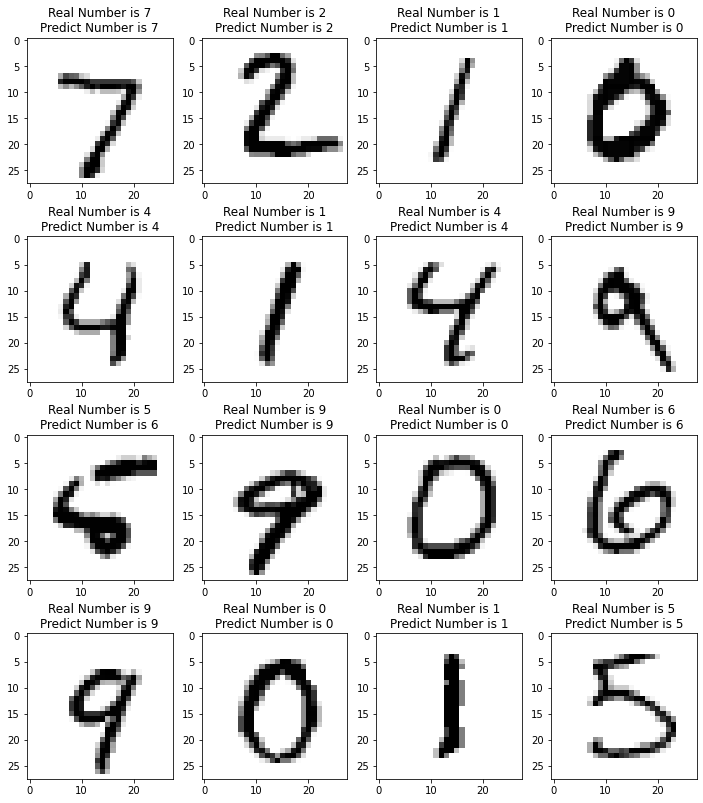

In [ ]:
y_pred = model_3.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

# 8. Results and Conclusion <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)


- In this kernel, we build a dense neural network model to classify the MNIST digits and predict accuracy.

- We get the test accuracy of 98.3%.

- The accuracy tells us that our ANN model classifies the digits 98.3% of time correctly.

